# Installing requirements

---



In [ ]:
#Installing necessary libraries
!pip install -q -U transformers bitsandbytes peft accelerate datasets scipy einops evaluate trl streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.1/245.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

In [ ]:
#Libraries for evaluation
!pip install codegen-metrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.2/488.2 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.5/394.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.1/166.1 kB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for func-timeout: filename=func_timeout-4.3

In [ ]:
#Importing necessary libraries
#For managing datasets
from datasets import load_dataset, dataset_dict, DatasetDict, Dataset
from sklearn.model_selection import train_test_split

#For using the model
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    HfArgumentParser,
    AutoTokenizer,
    BitsAndBytesConfig,
    TrainingArguments,
    Trainer,
    GenerationConfig
)
from tqdm import tqdm
from trl import SFTTrainer

import time
import pandas as pd
import numpy as np
from huggingface_hub import interpreter_login


# Setting global variables

---



In [ ]:
#setting environment variables
import os
os.environ["HUGGINGFACEHUB_API_TOKEN"] = "xxxxxxxxxxxxxxxxxxxxxxxxxx"

#setting token for using huggingfacehub
interpreter_login()


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: ··········
Add token as git credential? (Y/n) n
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful


# Loading Dataset

---



In [ ]:
###################LOADING DATASET##########################
dataset = load_dataset("Vezora/Tested-22k-Python-Alpaca")

# Split 75% train, 25% test + validation
train_testvalid = dataset['train'].train_test_split(test_size=0.25, seed=88)

# Split the resulting 25% test values in: valid = 15%, 10% = valid
test_valid = train_testvalid['test'].train_test_split(test_size=0.10, seed=88)

# Gather everything to have a single DatasetDict
dt_ttv = DatasetDict({
    'train': train_testvalid['train'],
    'test': test_valid['train'],
    'valid': test_valid['test']})

print(dt_ttv['train'].shape, dt_ttv['test'].shape, dt_ttv['valid'].shape)

Generating train split: 0 examples [00:00, ? examples/s]

(16956, 3) (5086, 3) (566, 3)


# Loading Model

---



In [ ]:
from transformers import BitsAndBytesConfig

base_model_name = "distilbert/distilgpt2"

if (torch.cuda.is_available()):
  # 1. Setup the quantization configuarion
  bnb_config = BitsAndBytesConfig(
      load_in_4bit=True,                     # Q = 4 bits
      bnb_4bit_use_double_quant=True,        # double quantization, quantizing the quantization constants for saving an additional 0.4 bits per parameter
      bnb_4bit_quant_type="nf4",             # 4-bit NormalFloat Quantization (optimal for normal weights; enforces w ∈ [-1,1])
      bnb_4bit_compute_dtype=torch.bfloat16  # Dequantize to 16-bits before computations (as in the paper)
  )
  # 2. Pass it while using the model
  model_A = AutoModelForCausalLM.from_pretrained(base_model_name, quantization_config=bnb_config, device_map="auto", trust_remote_code=True)
else:
  print("Current configuration requires CUDA(GPU), model_A not charged")

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(base_model_name, trust_remote_code=True)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "right"

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
#Identify max length allowed by the model
def get_max_length(model):
    conf = model.config
    max_length = None
    for length_setting in ["n_positions", "max_position_embeddings", "seq_length"]:
        max_length = getattr(model.config, length_setting, None)
        if max_length:
            print(f"Found max lenth: {max_length}")
            break
    if not max_length:
        max_length = 1024
        print(f"Using default max length: {max_length}")
    return max_length

In [ ]:
#method to generate model outputs
def generate(model, tokenizerl,p, maxlen=100, sample=True):
    toks = tokenizerl(p, return_tensors="pt")
    res = model.generate(**toks,
                         max_length=maxlen,
                         do_sample = True,
                         temperature = 0.5,
                         top_k = 50,
                         top_p = 0.85,
                         repetition_penalty=1.5)
    return tokenizerl.batch_decode(res,skip_special_tokens=True)

# Functions for Model Evaluation

---



In [ ]:
def human_evaluation(model, dataset, index):

  test_prompt = dataset[index]['instruction']
  test_output = dataset[index]['output']

  formatted_prompt = f"Instruct: Generate the python code with its respective explanation for the following instruction.\n{test_prompt}\nOutput:\n"
  res = generate(model,tokenizer,formatted_prompt,200,)
  #print(res[0])
  output = res[0].split('Output:\n')[1]

  dash_line = '-'.join('' for x in range(200))
  print(dash_line)
  print(f'INPUT PROMPT:\n{formatted_prompt}')
  print(dash_line)
  print(f'DATASET IMPLEMENTATION:\n{test_output}\n')
  print(dash_line)
  print(f'MODEL GENERATION:\n{output}')
  return

In [ ]:
#importing metrics for quantitative evaluation
from codegen_metrics import bleu, chrf, codebleu, meteor, rougel, ruby
import random

from transformers import set_seed
seed = 88
set_seed(seed)

def compute_metrics(model, dataset, metrics, number_examples):
  original_model_output_list = []

  #Generate random index for test data
  #Generates a list of a defined (Ex. 10) numbers between zero and the length of the test list
  random_index = random.sample(range(0,  len(dataset)-1), number_examples)

  computed_metrics = []

  #Iterate over the test dataset acording to the previoursly generated index values
  for idx in random_index:
    test_prompt = dataset[idx]['instruction']
    test_output = dataset[idx]['output']

    formatted_prompt = f"Provide a python code implementation for the following instruction.\n{test_prompt}\nOutput:\n"
    res = generate(model,tokenizer,formatted_prompt,get_max_length(model),)
    #print(res[0])
    output = res[0].split('Output:\n')[1]

    #Computing metrics and sum its result
    for metric_idx, metric in enumerate(metrics):
        #print('Computing metric metric_idx:'+str(metric_idx)+" "+metric.__name__)
        try:
          computed_metrics[metric_idx] = computed_metrics[metric_idx] + metric(test_output, output)
        except IndexError:
          computed_metrics.insert(metric_idx, metric(test_output, output))

  return computed_metrics

[nltk_data] Downloading package wordnet to /root/nltk_data...


# Evaluation Model A

---



## Human Evaluation

In [ ]:
############EVALUATION ZERO-SHOT-PART 1##############
#Human Evaluation
human_evaluation (model_A, dt_ttv['test'], 30)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INPUT PROMPT:
Instruct: Generate the python code with its respective explanation for the following instruction.
Create a function that returns the nth Fibonacci number using a recursive approach with memoization to optimize performance. Additionally, handle negative input values by raising a custom exception with a descriptive error message. The function should also have a time complexity of O(1) and a space complexity of O(n).
Output:

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DATASET IMPLEMENTATION:
To solve this problem, we can use a recursive approach with memoization to optimize performance. Memoization involves storing the resul

##Quantitative Evaluation

In [ ]:
############EVALUATION ZERO-SHOT- PART 2 ############
#Defining metrics
metrics = (bleu, chrf, codebleu, meteor, rougel, ruby)
number_examples = 10

###############################
#Computing automatic metrics
computed_metrics = compute_metrics(model_A, dt_ttv['test'], metrics, number_examples)

print('Computed Average Metrics')
for metric_idx, metric in enumerate(metrics):
  print(metric.__name__.ljust(10, ' ')+':  '+str(computed_metrics[metric_idx] / len(computed_metrics)))

##################

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') b

Found max lenth: 1024
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024
Computed Average Metrics
bleu      :  0.005220259496232237
chrf      :  0.1685540602995306
codebleu  :  0.20299651222702483
meteor    :  0.09830624565426122
rougel    :  0.09088068959396463
ruby      :  0.044881434642633077


# Preparating the dataset for fine tunning
---

## Functions to convert dataset instruction into prompt format

In [ ]:
def define_format_prompt(sample):
    """
    Format various fields of the sample ('instruction','output')
    Then concatenate them using two newline characters
    :param sample: Sample dictionnary
    """
    INTRO_BLURB = "Below is an instruction that describes a task. Write a response that appropriately completes the request."
    INSTRUCTION_KEY = "### Instruct: Write the python code that implements the following request."
    RESPONSE_KEY = "### Output:"
    END_KEY = "### End"

    blurb = f"\n{INTRO_BLURB}"
    instruction = f"{INSTRUCTION_KEY}"
    input_context = f"{sample['instruction']}" if sample["instruction"] else None
    response = f"{RESPONSE_KEY}\n{sample['output']}"
    end = f"{END_KEY}"

    parts = [part for part in [blurb, instruction, input_context, response, end] if part]

    formatted_prompt = "\n\n".join(parts)
    sample["text"] = formatted_prompt

    return sample

In [ ]:
from functools import partial

#Tokenizing the batch
def preprocess_batch(batch, tokenizer, max_length):
    """
    Tokenizing a batch
    """
    return tokenizer(
        batch["text"],
        max_length=max_length,
        truncation=True,
    )

def preprocess_dataset(tokenizer: AutoTokenizer, max_length: int,seed, dataset, is_formatted: bool):
    """Format and tokenize the dataset to make it ready for training
    :param tokenizer (AutoTokenizer): Model Tokenizer
    :param max_length (int): Maximum number of tokens to emit from tokenizer
    """

    # Add prompt to each sample
    print("Preprocessing dataset...")
    if is_formatted == False:
      dataset = dataset.map(define_format_prompt)#, batched=True)

    # Apply preprocessing to each batch of the dataset and remove unused fields if necessary
    _preprocessing_function = partial(preprocess_batch, max_length=max_length, tokenizer=tokenizer)
    dataset = dataset.map(
        _preprocessing_function,
        batched=True,
        remove_columns=['instruction', 'input', 'output'],
    )

    # Filter out samples that have input_ids exceeding max_length
    dataset = dataset.filter(lambda sample: len(sample["input_ids"]) < max_length)

    # Shuffle dataset
    dataset = dataset.shuffle(seed=seed)

    return dataset

## Tokenizing dataset

In [ ]:
## Pre-process dataset
max_length = get_max_length(model_A)
print(max_length)

seed = 88

train_dataset = preprocess_dataset(tokenizer, max_length,seed, dt_ttv['train'], False)
eval_dataset = preprocess_dataset(tokenizer, max_length,seed, dt_ttv['valid'], False)

Found max lenth: 1024
1024
Preprocessing dataset...


Map:   0%|          | 0/16956 [00:00<?, ? examples/s]

Map:   0%|          | 0/16956 [00:00<?, ? examples/s]

Filter:   0%|          | 0/16956 [00:00<?, ? examples/s]

Preprocessing dataset...


Map:   0%|          | 0/566 [00:00<?, ? examples/s]

Map:   0%|          | 0/566 [00:00<?, ? examples/s]

Filter:   0%|          | 0/566 [00:00<?, ? examples/s]

# Prepare Model B for PEFT

---



In [ ]:
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

# 1 - Using the prepare_model_for_kbit_training method from PEFT
# Preparing the Model for QLoRA
model_B = prepare_model_for_kbit_training(model_A)

# Setup PEFT for Fine-Tuning

---



In [ ]:
# 2 Lora Config
lora_config = LoraConfig(
    r=16, #Rank
    lora_alpha=64,
    bias="none",
    lora_dropout=0.1,  # Conventional
    task_type="CAUSAL_LM",
)

#3 Get unfrozen LoRA layers model
peft_model_B = get_peft_model(model_B, lora_config)
peft_model_B.print_trainable_parameters()

trainable params: 294,912 || all params: 82,207,488 || trainable%: 0.35874104315168953


# Train PEFT adapter

---



In [ ]:
from transformers import TrainingArguments

training_arguments = TrainingArguments(
    fp16=True,                           # Training computations in 16 bits
    # batch-related
    per_device_train_batch_size=2,       # Batch Size
    gradient_accumulation_steps=4,       # Batch Size (Mathematically)
    # optimizer-related
    optim="paged_adamw_32bit",           # Variant of AdamW designed to be more efficient on 32-bit GPUs
    learning_rate=1e-4,                  # Learning Rate
    warmup_ratio=0.05,                   # After 5% of the data, learning rate has linearly  from 0 to 1e-4
    lr_scheduler_type="cosine",          # Adjust learning rate sinusoidally
    max_grad_norm=0.3,                   # Clip gradients if less than 0.3 (prevent gradient explosion)
    # epochs and saving
    num_train_epochs=2,                  # Number of Epochs
    save_strategy="epoch",               # Save after each epoch
    output_dir="epoch-finetuned",        # Where to save the model
    # validation
    evaluation_strategy="steps",         # For the next argument
    eval_steps=0.2,                      # Evaluate after 20% of training steps
    # logging-related
    logging_steps=1,                     # Number of update steps between two logs
    group_by_length=True,                # Minimize padding by grouping sentences of similar length
    seed=88,                             # For consistent results
)

peft_model_B.gradient_checkpointing_enable()    # Store less activations and recompute later
peft_model_B.config.use_cache = False           # Disable using attention output cache. Should be enabled in inference.

In [ ]:
# Fine tunning trainer
from trl import SFTTrainer

peft_trainer = SFTTrainer(
    # tokenizer and model
    tokenizer=tokenizer,
    model=peft_model_B,
    # dataset and text field
    dataset_text_field="text",
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    # LoRA
    peft_config=lora_config,
    # Hyperparameters
    max_seq_length=1024,
    args=training_arguments,
)

Map:   0%|          | 0/14736 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
training_arguments.device


device(type='cuda', index=0)

In [ ]:
#Execute training for model_B
peft_trainer.train()


Step,Training Loss,Validation Loss
737,2.214500,1.761354
1474,1.937700,1.664990
2211,1.818900,1.615126
2948,1.655300,1.601590


TrainOutput(global_step=3684, training_loss=1.8636731767175512, metrics={'train_runtime': 2311.8232, 'train_samples_per_second': 12.748, 'train_steps_per_second': 1.594, 'total_flos': 4288672159580160.0, 'train_loss': 1.8636731767175512, 'epoch': 2.0})

# Merge the Base Model with the Trained Adapter

---



In [ ]:
#Saving the trained model
peft_model_path ="./fine-tuned-B-distilgpt2"
peft_trainer.model.save_pretrained(peft_model_path)
tokenizer.save_pretrained(peft_model_path)

# Inference Model B

---



In [ ]:
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer
model_B = AutoPeftModelForCausalLM.from_pretrained(peft_model_path, low_cpu_mem_usage=True, torch_dtype=torch.float16, load_in_4bit=True)
tokenizer_B = AutoTokenizer.from_pretrained(peft_model_path)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


# Evaluating Model B

---



## Human Evaluation B

In [ ]:
############EVALUATION PART 2##############
#Human Evaluation
human_evaluation (model_B, dt_ttv['test'], 50)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INPUT PROMPT:
Instruct: Generate the python code with its respective explanation for the following instruction.
Implement a recursive algorithm to find the minimum value in a list without using any built-in functions or libraries. The algorithm should work for both numerical and non-numerical elements in the list. Additionally, the algorithm should handle lists with duplicate minimum values correctly. Provide a piece of erroneous code that attempts to find the minimum value and explain how to fix it by considering edge cases and handling errors properly.
Output:

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DATASET IMPLEMENTATION:
Here i

## Quantitative Evaluation B

In [ ]:
#Defining metrics
metrics = (bleu, chrf, codebleu, meteor, rougel, ruby)
number_examples = 10

###############################
#Computing automatic metrics
computed_metrics = compute_metrics(model_B, dt_ttv['test'], metrics, number_examples)

print('Computed Average Metrics')
for metric_idx, metric in enumerate(metrics):
  print(metric.__name__.ljust(10, ' ')+':  '+str(computed_metrics[metric_idx] / len(computed_metrics)))

##################

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Computed Average Metrics
bleu      :  0.010518094359181988
chrf      :  0.24545718201031216
codebleu  :  0.34755775922301707
meteor    :  0.17731007628872522
rougel    :  0.14471847316070616
ruby      :  0.08010663517025564


# Dataset Generation

---



In [ ]:
AWS_API_KEY = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

## Prompt Preparation

In [ ]:
# Define a prompt for generating Python code snippets
prompt_1 = """I need to create a dataset for training a LLM. The dataset is composed by python code blocks.
Use the following template for each block:
### Instruct:

## Python code:

## Explanation:

### End

"""

prompt_2 = """Each block of code should perform a specific task or solve a problem commonly encountered in programming.
The block of code should be diverse and cover various aspects of Python programming, including data manipulation, control flow, function definition, error handling, and more.
Each block should be concise, typically a maximum of 30 lines of code, and well-commented to explain its purpose and functionality.
Additionally, in the output section add an example of how to use the generated block of code."""


prompt_3 = """Here is an example:

### Instruct:

Generate in pyhton a random sequence of 5 lowercase alphabetic characters, where the second letter is a vowel and there are no repeated characters in the sequence? Can you provide a code example?

## Python code:

import random
vowels = ['a', 'e', 'i', 'o', 'u']
alphabet = 'abcdefghijklmnopqrstuvwxyz'
def generate_random_string():
 # Choose a random vowel for the second letter
 second_letter = random.choice(vowels)
 # Choose 4 more random letters (excluding the second letter)
 other_letters = random.sample(alphabet.replace(second_letter, ''), 4)
 # Combine all the letters and shuffle them
 random_string = ''.join([random.choice([second_letter] + other_letters) for _ in range(5)])
 return random_string

# Example usage
random_string = generate_random_string()
print(random_string)

## Explanation:

This code defines a function `generate_random_string` that uses the `random` module to choose a random vowel for the second letter, and then chooses 4 more random letters (excluding the second letter) from the alphabet. It then combines all the letters and shuffles them to create a random string of 5 lowercase alphabetic characters with the desired properties.
Note that this code assumes Python 3.x. If you're using Python 2.x, you'll need to change the `print` statement to use parentheses.

### End

"""

prompt_4 = """Provide a list of 10 Python code examples.
Use the following template for each block:

### Instruct:

## Python code:

## Explanation:

### End

"""

#When no so much examples are answered, then try with less numbers here
prompt_5 = """Provide another list of 8 Python code examples.
Use the following template for each block:

### Instruct:

## Python code:

## Explanation:

### End

"""

## AWS Funtion

In [ ]:
import requests
import json

def llama_generate(prompt,
                   api_token,
                   max_gen_len = 1024,
                   temperature = 0.8,
                   top_p =0.9):
  url = 'https://6xtdhvodk2.execute-api.us-west-2.amazonaws.com/dsa_llm/generate'
  body = {
    "prompt": prompt,
    "max_gen_len": max_gen_len,
    "temperature": temperature,
    "top_p": top_p,
    "api_token": api_token
  }
  res = requests.post(url,  json = body)
  return  json.loads(res.text)["body"]["generation"]

## Creating context with LLM

In [ ]:
'''
We need to create a context first with the LLM using the webservice
Using 5 prompts for that purpose.
'''
#The first 3 steps doesnt matter the answer we get
print("Calling API with prompt 1:")
example = llama_generate(prompt_1, AWS_API_KEY)
print(example)
time.sleep(1)

print("Calling API with prompt 2:")
example = llama_generate(prompt_2, AWS_API_KEY)
print(example)
time.sleep(1)

print("Calling API with prompt 3:")
example = llama_generate(prompt_3, AWS_API_KEY)
print(example)
time.sleep(1)


## Generating new Data

If just need to read the data already generated use the following block

In [ ]:
#read saved data if needed
import csv
from pathlib import Path

responses = []

inpath = Path("generated_data.csv")

with inpath.open("r", newline="", encoding="utf-8") as infile:
    reader = csv.DictReader(infile)
    for row in reader:
        content= f"{row['text']}"
        responses.append(content)

print(len(responses))


10627


In [ ]:
print(len(responses))

10627


Methods to generate data entirely

In [ ]:
#For the 4th generation we expect to get the data, so retrieve the response
responses = []
examples = []

separator = "### End"

example = llama_generate(prompt_4, AWS_API_KEY)

#split the response
examples = example.split(separator)

#Check number of retrieved elements
if (len(examples) > 3):
  #Obviate first string because usually is part of the answer from the model
  for element in examples[1:]:
    #Check the size of the string to avoid null values
    if len(element) > 50:
      element = element.replace("\n", " ")
      element = element.strip()
      responses.append(element+''+separator)

if len(responses) < 3:
  print("Current API calling not working, check before continuing. \n\n Last generated answer: \n\n "+example)
else:
  print("Current generated samples: "+str(len(responses)))

In [ ]:
#As each call to aws service produce 10 examples
#here specify how much iterations execute for getting 10 examples at the time
number_of_iterations = 100
checker_fails = 5   #break generation if API call reach this number of fails
count_fails = 0

for i in range(number_of_iterations):

  if (i % 20) == 0:
    time.sleep(15)

  example = llama_generate(prompt_5, AWS_API_KEY)

  #split the response
  examples = example.split(separator)

  #Check number of retrieved elements
  if (len(examples) > 3):
    #Check and format elements
    for element in examples[1:]:
      #Check the size of the string to avoid null values
      if len(element) > 50:
        element = element.replace("\n", " ")
        element = element.strip()
        responses.append(element+''+separator)
  else:
    count_fails = count_fails + 1
    print("Current API calling not working. Strike "+str(count_fails)+".\n\n Last generated answer: \n\n "+example)


  if(count_fails == checker_fails and checker_fails > 0):
    break

  print("Generated samples at iteration: "+str(i)+" -> "+str(len(responses)))

In [ ]:
#save generated data if needed
import csv
from pathlib import Path


outpath = Path("generated_data.csv")
with outpath.open("w", newline="", encoding="utf-8") as outfile:
  writer = csv.DictWriter(outfile, ["text"])
  writer.writeheader()

  for res in responses:
    new_row = {"text": res}
    writer.writerow(new_row)



## Formatting Dataset

In [ ]:
# Create a DataFrame
generated_dataframe = pd.DataFrame({
    'instruction':"",
    'input':"",
    'output':"",
    'text': responses,
})

generated_dataset = Dataset.from_pandas(generated_dataframe)

generated_train_dataset = preprocess_dataset(tokenizer, get_max_length(model_A),seed, generated_dataset, True)

Found max lenth: 1024
Preprocessing dataset...


Map:   0%|          | 0/10627 [00:00<?, ? examples/s]

Filter:   0%|          | 0/10627 [00:00<?, ? examples/s]

# Training Model C on generated Data

---



In [ ]:
# 1 - Using the prepare_model_for_kbit_training method from PEFT
# Preparing the Model for QLoRA
model_C = prepare_model_for_kbit_training(model_A)

In [ ]:
# 2 Lora Config
lora_config = LoraConfig(
    r=16, #Rank
    lora_alpha=64,
    #target_modules=["q_lin", "k_lin","v_lin"],# Will apply LoRA to attention matrices
    bias="none",
    lora_dropout=0.1,  # Conventional
    task_type="CAUSAL_LM",
)

In [ ]:
#3 Get unfrozen LoRA layers model
peft_model_C = get_peft_model(model_C, lora_config)
peft_model_C.print_trainable_parameters()

trainable params: 294,912 || all params: 82,207,488 || trainable%: 0.35874104315168953


In [ ]:
training_arguments = TrainingArguments(
    fp16=True,                           # Training computations in 16 bits
    # batch-related
    per_device_train_batch_size=2,       # Batch Size
    gradient_accumulation_steps=4,       # Batch Size (Mathematically)
    # optimizer-related
    optim="paged_adamw_32bit",           # Variant of AdamW designed to be more efficient on 32-bit GPUs
    learning_rate=1e-4,                  # Learning Rate
    warmup_ratio=0.05,                   # After 5% of the data, learning rate has linearly  from 0 to 1e-4
    lr_scheduler_type="cosine",          # Adjust learning rate sinusoidally
    max_grad_norm=0.3,                   # Clip gradients if less than 0.3 (prevent gradient explosion)
    # epochs and saving
    num_train_epochs=2,                  # Number of Epochs
    save_strategy="epoch",               # Save after each epoch
    output_dir="epoch-finetuned",        # Where to save the model
    # validation
    evaluation_strategy="steps",         # For the next argument
    eval_steps=0.2,                      # Evaluate after 20% of training steps
    # logging-related
    logging_steps=1,                     # Number of update steps between two logs
    group_by_length=True,                # Minimize padding by grouping sentences of similar length
    seed=88,                             # For consistent results
)


peft_model_C.gradient_checkpointing_enable()    # Store less activations and recompute later
peft_model_C.config.use_cache = False           # Disable using attention output cache. Should be enabled in inference.


In [ ]:
peft_trainer_C = SFTTrainer(
    # tokenizer and model
    tokenizer=tokenizer,
    model=peft_model_C,
    # dataset and text field
    dataset_text_field="text",
    train_dataset=generated_train_dataset,
    eval_dataset=eval_dataset,
    # LoRA
    peft_config=lora_config,
    # Hyperparameters
    max_seq_length=1024,
    args=training_arguments,
)

Map:   0%|          | 0/10627 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
training_arguments.device

device(type='cuda', index=0)

In [ ]:
#Execute training for model_B
peft_trainer_C.train()

Step,Training Loss,Validation Loss
532,1.957200,2.659736
1064,1.858500,2.707440
1596,1.726900,2.729815
2128,2.054500,2.760836


TrainOutput(global_step=2656, training_loss=1.8677980454571277, metrics={'train_runtime': 728.1878, 'train_samples_per_second': 29.188, 'train_steps_per_second': 3.647, 'total_flos': 676751265423360.0, 'train_loss': 1.8677980454571277, 'epoch': 2.0})

In [ ]:
#Saving the trained model
peft_model_path_C ="./fine-tuned-C-distilgpt2"
peft_trainer_C.model.save_pretrained(peft_model_path_C)
tokenizer.save_pretrained(peft_model_path_C)

In [ ]:
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer
model_C = AutoPeftModelForCausalLM.from_pretrained(peft_model_path_C, low_cpu_mem_usage=True, torch_dtype=torch.float16, load_in_4bit=True)
tokenizer_C = AutoTokenizer.from_pretrained(peft_model_path_C)

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


# Evaluating Model C

---



## Human Evaluation

In [ ]:
############EVALUATION PART 3##############
#Human Evaluation
human_evaluation (model_C, dt_ttv['test'], 50)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INPUT PROMPT:
Instruct: Generate the python code with its respective explanation for the following instruction.
Implement a recursive algorithm to find the minimum value in a list without using any built-in functions or libraries. The algorithm should work for both numerical and non-numerical elements in the list. Additionally, the algorithm should handle lists with duplicate minimum values correctly. Provide a piece of erroneous code that attempts to find the minimum value and explain how to fix it by considering edge cases and handling errors properly.
Output:

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DATASET IMPLEMENTATION:
Here i

## Quantivative Evaluation

In [ ]:
#Defining metrics
metrics = (bleu, chrf, codebleu, meteor, rougel, ruby)
number_examples = 10

###############################
#Computing automatic metrics
computed_metrics = compute_metrics(model_C, dt_ttv['test'], metrics, number_examples)

print('Computed Average Metrics')
for metric_idx, metric in enumerate(metrics):
  print(metric.__name__.ljust(10, ' ')+':  '+str(computed_metrics[metric_idx] / len(computed_metrics)))

##################

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Computed Average Metrics
bleu      :  0.013529914109820164
chrf      :  0.29417006918215294
codebleu  :  0.32414523651157806
meteor    :  0.252781368895394
rougel    :  0.16546644788030676
ruby      :  0.0929314436698609


# Mixing and shuffleling Datasets

---



In [ ]:
import random
from datasets import concatenate_datasets

generated_dataset_shuffled = generated_dataset.shuffle(seed=66)
train_dataset_shuffled = train_dataset.shuffle(seed=66)

mixed_dataset = concatenate_datasets([generated_dataset_shuffled, train_dataset_shuffled])


## Preparing new mixed training dataset

In [ ]:
mixed_train_dataset = preprocess_dataset(tokenizer, 1024,seed, mixed_dataset, True)

Preprocessing dataset...


Map:   0%|          | 0/25363 [00:00<?, ? examples/s]

Filter:   0%|          | 0/25363 [00:00<?, ? examples/s]

# Training model D on mixed Data

---



In [ ]:
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

# 1 - Using the prepare_model_for_kbit_training method from PEFT
# Preparing the Model for QLoRA
model_D = prepare_model_for_kbit_training(model_A)

In [ ]:
# 2 Lora Config
lora_config = LoraConfig(
    r=16, #Rank
    lora_alpha=64,
    #target_modules=["q_lin", "k_lin","v_lin"],# Will apply LoRA to attention matrices
    bias="none",
    lora_dropout=0.1,  # Conventional
    task_type="CAUSAL_LM",
)

In [ ]:
#3 Get unfrozen LoRA layers model
peft_model_D = get_peft_model(model_D, lora_config)
peft_model_D.print_trainable_parameters()


trainable params: 294,912 || all params: 82,207,488 || trainable%: 0.35874104315168953


In [ ]:
training_arguments = TrainingArguments(
    fp16=True,                           # Training computations in 16 bits
    # batch-related
    per_device_train_batch_size=2,       # Batch Size
    gradient_accumulation_steps=4,       # Batch Size (Mathematically)
    # optimizer-related
    optim="paged_adamw_32bit",           # Variant of AdamW designed to be more efficient on 32-bit GPUs
    learning_rate=1e-4,                  # Learning Rate
    warmup_ratio=0.05,                   # After 5% of the data, learning rate has linearly  from 0 to 1e-4
    lr_scheduler_type="cosine",          # Adjust learning rate sinusoidally
    max_grad_norm=0.3,                   # Clip gradients if less than 0.3 (prevent gradient explosion)
    # epochs and saving
    num_train_epochs=2,                  # Number of Epochs
    save_strategy="epoch",               # Save after each epoch
    output_dir="epoch-finetuned",        # Where to save the model
    # validation
    evaluation_strategy="steps",         # For the next argument
    eval_steps=0.2,                      # Evaluate after 20% of training steps
    # logging-related
    logging_steps=1,                     # Number of update steps between two logs
    group_by_length=True,                # Minimize padding by grouping sentences of similar length
    seed=88,                             # For consistent results
)

peft_model_D.gradient_checkpointing_enable()    # Store less activations and recompute later
peft_model_D.config.use_cache = False           # Disable using attention output cache. Should be enabled in inference.


In [ ]:
peft_trainer_D = SFTTrainer(
    # tokenizer and model
    tokenizer=tokenizer,
    model=peft_model_D,
    # dataset and text field
    dataset_text_field="text",
    train_dataset=mixed_train_dataset,
    eval_dataset=eval_dataset,
    # LoRA
    peft_config=lora_config,
    # Hyperparameters
    max_seq_length=1024,
    args=training_arguments,
)

Map:   0%|          | 0/25363 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [ ]:
training_arguments.device

device(type='cuda', index=0)

In [ ]:
#Execute training for model_D
peft_trainer_D.train()

Step,Training Loss,Validation Loss
1268,1.916500,1.754926
2536,1.680800,1.660328
3804,1.632000,1.615059
5072,1.577100,1.596318
6340,1.571000,1.593835


TrainOutput(global_step=6340, training_loss=1.8440466405653426, metrics={'train_runtime': 3012.5678, 'train_samples_per_second': 16.838, 'train_steps_per_second': 2.105, 'total_flos': 4970586162216960.0, 'train_loss': 1.8440466405653426, 'epoch': 2.0})

In [ ]:
#Saving the trained model
peft_model_path_D ="./fine-tuned-D-distilgpt2"
peft_trainer_D.model.save_pretrained(peft_model_path_D)
tokenizer.save_pretrained(peft_model_path_D)

('./fine-tuned-D-distilgpt2/tokenizer_config.json',
 './fine-tuned-D-distilgpt2/special_tokens_map.json',
 './fine-tuned-D-distilgpt2/vocab.json',
 './fine-tuned-D-distilgpt2/merges.txt',
 './fine-tuned-D-distilgpt2/added_tokens.json',
 './fine-tuned-D-distilgpt2/tokenizer.json')

In [ ]:
#Inference
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer
peft_model_path_D ="./fine-tuned-D-distilgpt2"
model_D = AutoPeftModelForCausalLM.from_pretrained(peft_model_path_D, low_cpu_mem_usage=True, torch_dtype=torch.float16, load_in_4bit=True)
tokenizer_D = AutoTokenizer.from_pretrained(peft_model_path_D)


config.json:   0%|          | 0.00/762 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/353M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

# Evaluating Model D

---



## Human Evaluation

In [ ]:
############EVALUATION PART 4##############
#Human Evaluation
human_evaluation (model_D, dt_ttv['test'], 50)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:391: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn('Input type into Linear4bit is torch.float16, but bnb_4bit_compute_dtype=torch.float32 (default). This will lead to slow inference or training speed.')


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
INPUT PROMPT:
Instruct: Generate the python code with its respective explanation for the following instruction.
Implement a recursive algorithm to find the minimum value in a list without using any built-in functions or libraries. The algorithm should work for both numerical and non-numerical elements in the list. Additionally, the algorithm should handle lists with duplicate minimum values correctly. Provide a piece of erroneous code that attempts to find the minimum value and explain how to fix it by considering edge cases and handling errors properly.
Output:

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
DATASET IMPLEMENTATION:
Here i

## Quantitative Evaluation

In [ ]:
#Defining metrics
metrics = (bleu, chrf, codebleu, meteor, rougel, ruby)
number_examples = 10

###############################
#Computing automatic metrics
computed_metrics = compute_metrics(model_D, dt_ttv['test'], metrics, number_examples)

print('Computed Average Metrics')
for metric_idx, metric in enumerate(metrics):
  print(metric.__name__.ljust(10, ' ')+':  '+str(computed_metrics[metric_idx] / len(computed_metrics)))

##################

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Found max lenth: 1024


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1460: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Found max lenth: 1024
Computing metric metric_idx:0 bleu
Computing metric metric_idx:1 chrf
Computing metric metric_idx:2 codebleu
Computing metric metric_idx:3 meteor
Computing metric metric_idx:4 rougel
Computing metric metric_idx:5 ruby
Computed Average Metrics
bleu      :  0.04274162402869136
chrf      :  0.3746942628453012
codebleu  :  0.28063117903897855
meteor    :  0.32166510368378437
rougel    :  0.2058187837923435
ruby      :  0.103744190580163


#Plotting Results

---



## Getting Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#read collected data from evaluations inside the file
results = pd.read_csv('model_evaluation.csv')
results.head()

#This two metrics have different range values
outsiders = ['bleu', 'ruby']

#graph1
results_1 =  results[~results['metric'].isin(outsiders)]

## Graph

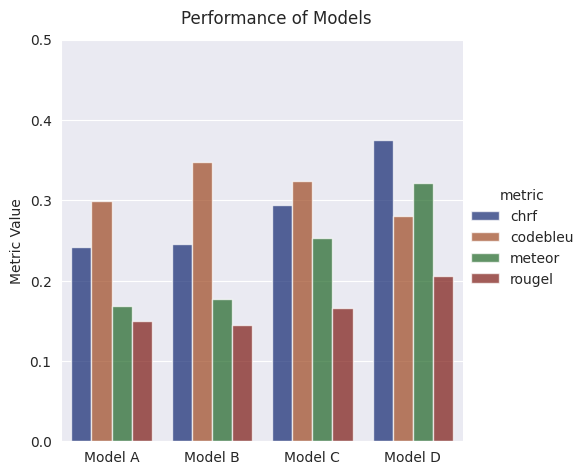

In [ ]:
ax = sns.catplot(x="model", y="value",hue="metric",data = results_1,
                 kind="bar",
                 palette="dark",
                 alpha=.7,
                 )
ax.set_axis_labels("", "Metric Value")
ax.set(ylim=(0, 0.5))

ax.fig.suptitle('Performance of Models')

ax.fig.subplots_adjust(top=0.92)
sns.set_style("darkgrid")

sns.despine()
